# Model Building

### Import Training Set, Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./datasets/train_clean.csv')
df_test = pd.read_csv('./datasets/test_clean.csv')

### Create functions for running/testing models

In [4]:
def print_metrics(y, y_hat):
    mae = metrics.mean_absolute_error(y, y_hat)
    mse = metrics.mean_squared_error(y, y_hat)
    rmse = np.sqrt(metrics.mean_squared_error(y, y_hat))
    r2 = metrics.r2_score(y, y_hat)
    print(f'MAE is {mae}, MSE is {mse}, RMSE is {rmse}, R2 is {r2}')

In [5]:
def r2_scores(model, X_train, X_test, y_train, y_test):
    train = model.score(X_train, y_train) # .0011
    test = model.score(X_test, y_test) # .0007 (.00065)
    cv = cross_val_score(model, X_train, y_train, cv=5).mean()
    print(f'Train R2 is {train}, Test R2 is {test}, Mean cross value score is {cv}')

In [6]:
# Linear Regression
def lr_model_eval(X, y, log_target=False, print_graph=True):    
    X = X
    y = y
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42) 
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    #prints r2 score of test, train, and cross value score
    r2_scores(lr, X_train, X_test, y_train, y_test)
    
    if log_target:
        y_preds = np.exp(lr.predict(X_test))
        y_test = np.exp(y_test)
    else:
        y_preds = lr.predict(X_test)
        
    mae = np.round_(mean_absolute_error(y_test, y_preds), decimals=2)
    print(f'the Mean Absolute Error is ${mae}')
        
    if print_graph:
        # Plot the model
        plt.figure(figsize=(6,6))
        sns.regplot(y_test, y_preds, line_kws={"color": "violet"}, scatter_kws={"color": "teal", 'alpha':0.3});
 
        plt.xlabel("Predicted Sale Price", fontsize = 14)
        plt.ylabel("Actual Sale Price", fontsize = 14)
        plt.title('Predicted vs. Actual Sale Price', fontsize = 16);
        #code from class, modified
    return lr

In [7]:
# OLS
def ols_model_eval(X, y, n='', print_all=True): 
    X = X
    y = y
    X = sm.add_constant(X).astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
    
    model = sm.OLS(y, X).fit()
    summary_df = model.summary2().tables[1]
    significant_cols = summary_df.loc[summary_df['P>|t|'] < 0.05, :].sort_values(by='P>|t|').index.to_list()
    if print_all:
        print(model.summary())
    print('r2 is: ',model.rsquared)
    return significant_cols

### Drop Outliers from Training Set

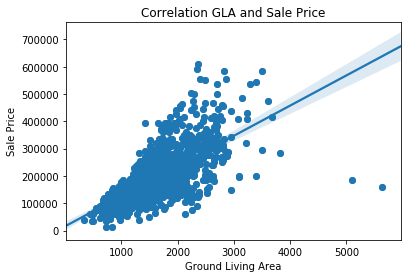

In [8]:
plt.scatter(df['gr_liv_area'], df['saleprice'])
sns.regplot(df['gr_liv_area'], df['saleprice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Correlation GLA and Sale Price');

In [9]:
df[df.gr_liv_area > 4500]
df.drop([960, 1884], axis=0, inplace=True)

#### Drop row with missing values for garage_cars and garage_area columns

In [10]:
garage_cols = [col for col in df.columns if 'garage' in col]
garage_cols
df.loc[df['garage_cars'].isnull() | df['garage_area'].isnull(), garage_cols]
df.drop(1712, axis=0, inplace=True)

### Log of non-zero columns correlate better than when not logged with the target (log_saleprice)

In [11]:
to_log = ['lot_area','1st_flr_sf','gr_liv_area']
log_cols = ['log_lot_area','log_1st_flr_sf','log_gr_liv_area']
without_logs_log_salprice = to_log + ['log_saleprice']
with_logs_log_salprice = log_cols + ['log_saleprice']
without_logs_saleprice = to_log + ['saleprice']
with_logs_saleprice = log_cols + ['saleprice']

In [12]:
df[without_logs_log_salprice].corr()['log_saleprice']
df[with_logs_log_salprice].corr()['log_saleprice']
df[with_logs_saleprice].corr()['saleprice']
df[with_logs_saleprice].corr()['saleprice']

log_lot_area       0.368602
log_1st_flr_sf     0.612927
log_gr_liv_area    0.699047
saleprice          1.000000
Name: saleprice, dtype: float64

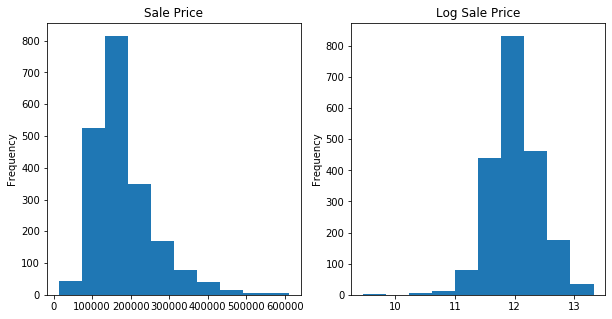

In [13]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df['saleprice'].plot(kind='hist', title='Sale Price', ax=ax[0])
np.log(df['saleprice']).plot(kind='hist', title='Log Sale Price', ax=ax[1]);

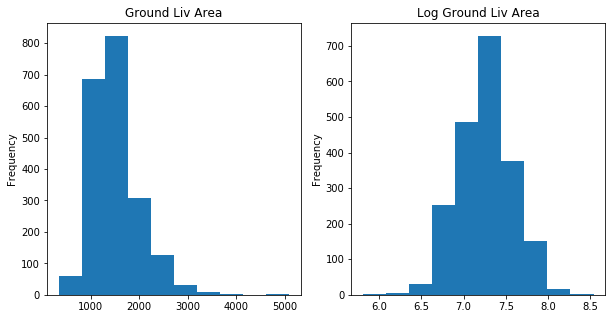

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df['gr_liv_area'].plot(kind='hist', title='Ground Liv Area', ax=ax[0])
np.log(df['gr_liv_area']).plot(kind='hist', title='Log Ground Liv Area', ax=ax[1]);

Text(0, 0.5, 'Sale Price')

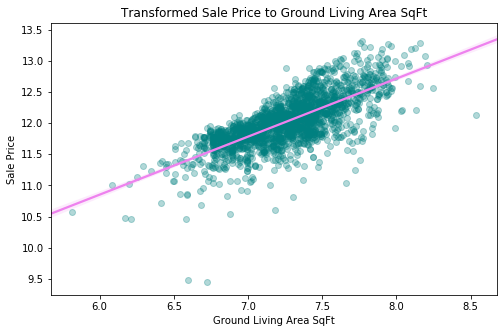

In [15]:
#plt.scatter(x=np.log(df['gr_liv_area']), y=np.log(df['saleprice']));
plt.figure(figsize= (8,5))
sns.regplot(np.log(df['gr_liv_area']), np.log(df['saleprice']), line_kws={"color": "violet"}, scatter_kws={"color": "teal", 'alpha':0.3});
plt.title('Transformed Sale Price to Ground Living Area SqFt')
plt.xlabel('Ground Living Area SqFt')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

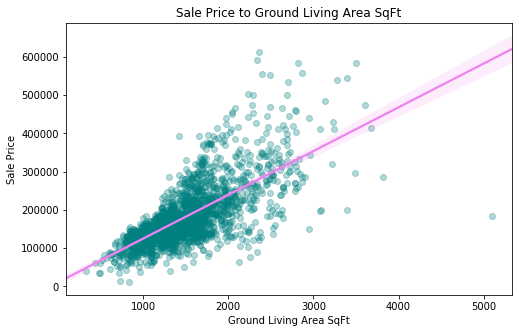

In [16]:
plt.figure(figsize= (8,5))
sns.regplot(df['gr_liv_area'], df['saleprice'], line_kws={"color": "violet"}, scatter_kws={"color": "teal", 'alpha':0.3});

plt.title('Sale Price to Ground Living Area SqFt')
plt.xlabel('Ground Living Area SqFt')
plt.ylabel('Sale Price')

# Feature selection, creation, and modelling

#### Narrow down potential features

In [17]:
dum_cols = [col for col in df.columns if 'dum_' in col]
dum_neighborhood = [col for col in df.columns if 'dum_nh' in col]
dum_zone = [col for col in df.columns if 'dum_zon' in col]
dum_cond1 = [col for col in df.columns if 'dum_cond' in col]
dum_foundation = [col for col in df.columns if 'dum_found' in col]
dum_misc = [col for col in df.columns if 'dum_misc' in col]
dum_electrical = [col for col in df.columns if 'dum_elect' in col]
dum_garagetype = [col for col in df.columns if 'dum_gar' in col]

In [18]:
df_not_null = df.columns[~df.isna().any()].tolist()
#df_null = df.columns[df.isna().any()].tolist()
possible_features_cols = df[df_not_null].select_dtypes(exclude='object').columns.values.tolist()
#remove cols that aren't relevent, are the target, or have log versions
remove_cols = ['id', 'pid', 'log_saleprice', 'saleprice', 'gr_liv_area', '1st_flr_sf', 'lot_area']
for item in remove_cols:
    possible_features_cols.remove(item)
len(possible_features_cols) # length is 111

111

## Correlations

### Top 40 features in terms of correlation with target

In [19]:
abs_val_feature_corr = abs(df[possible_features_cols+['log_saleprice']].corr()['log_saleprice'])
top_53_corr_cols = abs_val_feature_corr.sort_values(ascending=False)[1:55].index.to_list()
top_53_corr_cols

['overall_qual',
 'log_gr_liv_area',
 'exter_qual',
 'kitchen_qual',
 'garage_cars',
 'garage_area',
 'total_bsmt_sf',
 'year_built',
 'log_1st_flr_sf',
 'year_remod/add',
 'garage_finish',
 'full_bath',
 'dum_found_PConc',
 'fireplace_qu',
 'totrms_abvgrd',
 'fireplaces',
 'mas_vnr_area',
 'dum_gartype_Attchd',
 'bsmtfin_sf_1',
 'porch',
 'dum_gartype_Detchd',
 'central_air_dum',
 'dum_nh_NridgHt',
 'garage_qual',
 'log_lot_area',
 'garage_cond',
 'dum_found_CBlock',
 'dum_zone_RM',
 'wood_deck_sf',
 'open_porch_sf',
 'dum_elect_SBrkr',
 'half_bath',
 'bsmt_cond',
 'bsmt_full_bath',
 'dum_zone_RL',
 'dum_nh_IDOTRR',
 '2nd_flr_sf',
 'dum_nh_OldTown',
 'dum_nh_NoRidge',
 'dum_gartype_BuiltIn',
 'dum_nh_Edwards',
 'dum_nh_StoneBr',
 'dum_zone_C (all)',
 'bsmt_unf_sf',
 'functional',
 'dum_nh_Somerst',
 'bedroom_abvgr',
 'dum_elect_FuseF',
 'dum_found_Slab',
 'dum_nh_NAmes',
 'dum_nh_BrkSide',
 'enclosed_porch',
 'lot_frontage',
 'fence']

### Log of non-zero columns generally correlate better than when not logged with the target (log_saleprice)

In [960]:
to_log = ['lot_area','1st_flr_sf','gr_liv_area']
log_cols = []
for col in to_log:
    df['log_' + col] = np.log(df[col])
    log_cols.append('log_' + col)
without_logs_log_salprice = to_log + ['log_saleprice']
with_logs_log_salprice = log_cols + ['log_saleprice']
without_logs_saleprice = to_log + ['saleprice']
with_logs_saleprice = log_cols + ['saleprice']

In [961]:
df[without_logs_saleprice].corr()['saleprice']

lot_area       0.302320
1st_flr_sf     0.632040
gr_liv_area    0.710348
saleprice      1.000000
Name: saleprice, dtype: float64

In [962]:
df[with_logs_saleprice].corr()['saleprice']

log_lot_area       0.368602
log_1st_flr_sf     0.612927
log_gr_liv_area    0.699047
saleprice          1.000000
Name: saleprice, dtype: float64

In [963]:
df[without_logs_log_salprice].corr()['log_saleprice']

lot_area         0.284778
1st_flr_sf       0.611596
gr_liv_area      0.700152
log_saleprice    1.000000
Name: log_saleprice, dtype: float64

In [964]:
df[with_logs_log_salprice].corr()['log_saleprice']

log_lot_area       0.362433
log_1st_flr_sf     0.619398
log_gr_liv_area    0.725038
log_saleprice      1.000000
Name: log_saleprice, dtype: float64

### Linear Regression -  All Features : Saleprice vs. Good P-value Features : Saleprice (reduces variance)

number of features is: 111
Train R2 is 0.9118250978429079, Test R2 is 0.9067738425266847, Mean cross value score is 0.8692071766634708
the Mean Absolute Error is $18256.36


Text(0.5, 1.0, 'Model Performance, 111 Features')

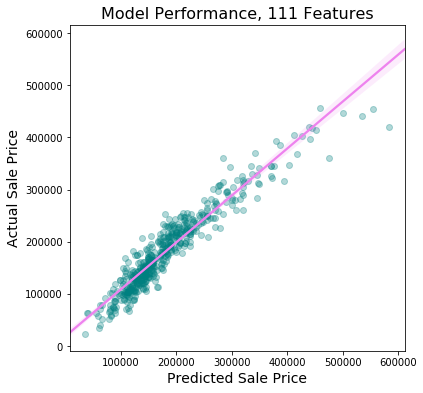

In [965]:
features = possible_features_cols
X = df[features]
y = df['saleprice']
#columns with p score under alpha
print(f'number of features is: {len(features)}')
lr_model_eval(X, y, print_graph=True)
plt.title("Model Performance, 111 Features", size=16)

### See the top Features indicated by OLS

In [991]:
y = df['saleprice']
X = df[features]
X = sm.add_constant(X).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

model = sm.OLS(y, X).fit()
summary_df = model.summary2().tables[1]
summary_df.loc[summary_df['P>|t|'] < 0.05, :].sort_values(by='P>|t|')

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
dum_misc_Elev,-4.129889e+05,2.811377e+04,-14.689917,1.820828e-46,-4.681243e+05,-3.578535e+05
overall_qual,1.128646e+04,8.284423e+02,13.623712,1.762521e-40,9.661757e+03,1.291116e+04
log_lot_area,2.133835e+04,1.664735e+03,12.817863,3.344262e-36,1.807355e+04,2.460315e+04
bsmtfin_sf_1,2.643660e+01,2.095668e+00,12.614884,3.694861e-35,2.232668e+01,3.054653e+01
exter_qual,1.743716e+04,1.804327e+03,9.664077,1.264625e-21,1.389860e+04,2.097572e+04
dum_nh_CollgCr,-2.281705e+04,2.427032e+03,-9.401214,1.425660e-20,-2.757683e+04,-1.805727e+04
2nd_flr_sf,4.757375e+01,5.185513e+00,9.174358,1.099250e-19,3.740417e+01,5.774334e+01
total_bsmt_sf,2.389158e+01,2.650952e+00,9.012451,4.595260e-19,1.869266e+01,2.909050e+01
dum_nh_SawyerW,-2.668476e+04,3.162996e+03,-8.436545,6.181580e-17,-3.288788e+04,-2.048164e+04
year_built,3.621197e+02,4.646652e+01,7.793132,1.043482e-14,2.709918e+02,4.532477e+02


r2 is:  0.9127419720454784
number of features is: 52
Train R2 is 0.906282221533888, Test R2 is 0.9045833900661799, Mean cross value score is 0.8679868336264416
the Mean Absolute Error is $18300.7


Text(0.5, 1.0, 'Model Performance, 52 Significant Features')

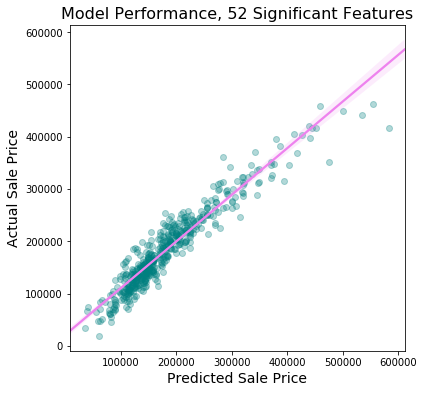

In [966]:
y = df['saleprice']
features = ols_model_eval(df[possible_features_cols], y, print_all=False) # ols_model_eval returns a list of features with an alpha below .05
print(f'number of features is: {len(features)}')
X = df[features]

lr_model_eval(X, y)
plt.title("Model Performance, 52 Significant Features", size=16)

### Linear Regression -   Good P-value Features : log_Saleprice (improves model)

r2 is:  0.930165948408163
number of features is: 53
Train R2 is 0.9256342488536864, Test R2 is 0.9225520664561967, Mean cross value score is 0.8966371627635337
the Mean Absolute Error is $14406.73


Text(0.5, 1.0, '52 Significant Features : Log Sale Price')

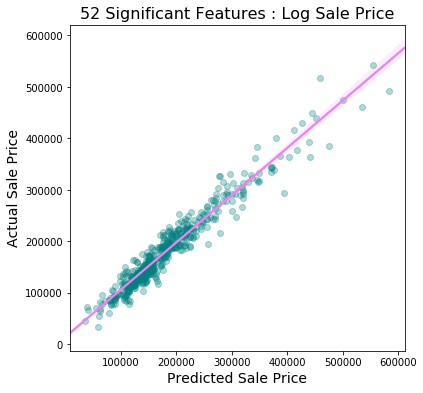

In [967]:
y = df['log_saleprice']
features = ols_model_eval(df[possible_features_cols], y, print_all=False) # ols_model_eval returns a list of features with an alpha below .05
print(f'number of features is: {len(features)}')
features.remove('const')
X = df[features]

lr_model_eval(X, y, log_target=True)
plt.title("52 Significant Features : Log Sale Price", size=16)

### Linear Regression: Features with good P-values : Log Sale Price

r2 is:  0.930165948408163
number of features is: 53
Train R2 is 0.9256342488536864, Test R2 is 0.9225520664561967, Mean cross value score is 0.8966371627635337
the Mean Absolute Error is $14406.73


Text(0.5, 1.0, 'test')

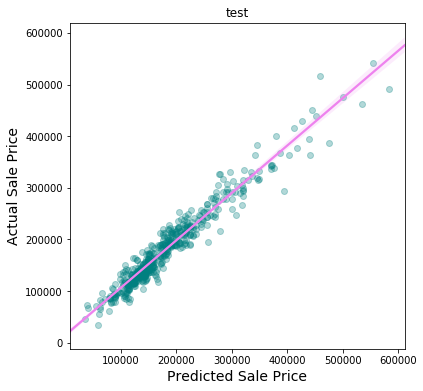

In [968]:
y = df['log_saleprice']
features = ols_model_eval(df[possible_features_cols], y, print_all=False) # ols_model_eval returns a list of features with an alpha below .05
print(f'number of features is: {len(features)}')

features.remove('const')
X = df[features]
model = lr_model_eval(X, y, log_target=True)
plt.title('test')

In [969]:
prediction_data = df_test[features]
kaggle_preds = model.predict(prediction_data)
sample = df_test[['id']].copy()

sample['SalePrice'] = kaggle_preds

sample.columns = ['Id', 'SalePrice']
sample.head()

,Id,SalePrice
0,2658,11.781060
1,2718,12.012074
2,2414,12.272854
3,1989,11.622391
4,625,12.041748


In [970]:
submission = sample
submission.to_csv('submission_1.csv', index=False)

### create polynomial features

In [971]:
# create polynomial features

# X = df.drop(['mpg', 'car_name'], axis = 1)
# y = df['mpg']
# poly = PolynomialFeatures()
# X_poly = poly.fit_transform(X)
# X_poly_features = poly.get_feature_names(X.columns)
# X_poly = pd.DataFrame(X_poly, columns = X_poly_features)
# X_poly.head()

In [972]:
def lasso_it(X, y, print_graph=True, log_target=False):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    # Scale the data
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    lasso = LassoCV(max_iter = 1_000)
    lasso = lasso.fit(X_train_sc, y_train)
    
    train_score = lasso.score(X_train_sc, y_train)
    test_score = lasso.score(X_test_sc, y_test)
    cv_score = cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()
    
    if log_target:
        y_preds = np.exp(lasso.predict(X_test_sc))
        y_test = np.exp(y_test)
    else:
        y_preds = lasso.predict(X_test_sc)
    
    #coefficients
    lasso.coef_
    df = pd.DataFrame(zip(X, lasso.coef_), columns = ['feature', 'coefficient'] ).sort_values(by='coefficient')
    
    print(f'Train Score: {train_score}. Test Score: {test_score}. CV Score: {cv_score}.')
    mae = np.round_(mean_absolute_error(y_test, y_preds), decimals=2)
    print(f'the Mean Absolute Error is ${mae}')
    
    if print_graph:
        # Plot the model
        plt.figure(figsize=(6,6))
        # plot predicted values against actual
        #plt.scatter(y_preds, y_test, s=5, color='blue', alpha = 0.5)
        sns.regplot(y_test, y_preds, line_kws={"color": "violet"}, scatter_kws={"color": "teal", 'alpha':0.3});
        # Plot a line.
#         plt.plot([0, np.max(y_test)],
#                  [0, np.max(y_test)],
#                  color = 'black')
        plt.xlabel("Predicted Sale Price", fontsize = 14)
        plt.ylabel("Actual Sale Price", fontsize = 14)
        plt.title('Predicted vs. Actual Sale Price', fontsize = 16);
        
    return lasso, df

### Lasso with all features

Train Score: 0.9212188822718594. Test Score: 0.9255602370104358. CV Score: 0.8955157184673063.
the Mean Absolute Error is $14059.53


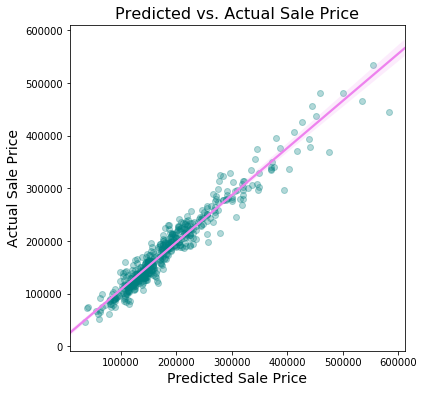

In [973]:
y = df['log_saleprice']
X = df[possible_features_cols]

lasso_model, lasso_data = lasso_it(X, y, log_target=True)

In [974]:
len(lasso_data.loc[lasso_data['coefficient']>0, 'feature'].to_list())

45

### Make poly features and lasso - fed in top 53 features (<.05 p-values)

r2 is:  0.930165948408163
number of features is: 53
Train Score: 0.9373249363309051. Test Score: 0.9257574579233743. CV Score: 0.8937992424586051.
the Mean Absolute Error is $13930.96


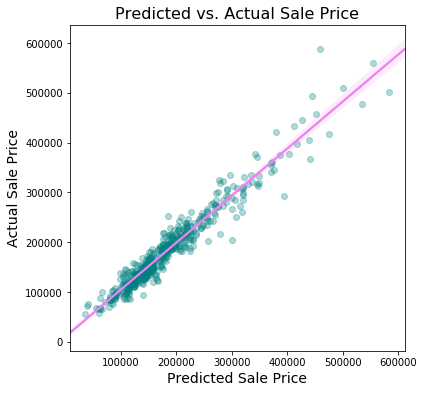

In [975]:
features = ols_model_eval(df[possible_features_cols], y, print_all=False) # ols_model_eval returns a list of features with an alpha below .05
print(f'number of features is: {len(features)}')
features.remove('const')

y = df['log_saleprice']
X = df[features]
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
X_poly_features = poly.get_feature_names()

# X_poly = pd.DataFrame(X_poly, columns = X_poly_features, index=X.index)
# X_poly = sm.add_constant(X_poly)

model, lasso_df = lasso_it(X_poly, y, log_target=True)

#model = sm.OLS(y, X_poly).fit()
# model.summary()

In [984]:
len(lasso_df.loc[lasso_df['coefficient']>0, 'feature'].to_list())
#X_poly.shape
lasso_df.head(100)

,feature,coefficient
303,"[1.0, 6.0, 4.0, 8.94793610670867, 0.0, 1954.0,...",-0.044931
656,"[1.0, 2.0, 4.0, 9.169518377455928, 0.0, 1900.0...",-0.027062
308,"[1.0, 5.0, 6.0, 9.169518377455928, 319.0, 1917...",-0.016880
378,"[1.0, 6.0, 7.0, 9.521568058002977, 1880.0, 197...",-0.016424
1390,"[1.0, 6.0, 5.0, 8.872066513408342, 648.0, 1967...",-0.015543
...,...,...
927,"[1.0, 5.0, 8.0, 9.305650551780507, 0.0, 2000.0...",0.000000
936,"[1.0, 5.0, 7.0, 9.289151552400472, 342.0, 1999...",0.000000
937,"[1.0, 8.0, 6.0, 9.169518377455928, 381.0, 1900...",0.000000
926,"[1.0, 5.0, 4.0, 9.452109387413557, 600.0, 1972...",-0.000000


In [877]:
#pd.DataFrame(zip(X_poly_features, lasso.coef_), columns = ['feature', 'coefficient'] ).sort_values(by='coefficient')

Kaggle Predictions

In [ ]:
df_test[features]

In [ ]:
pred_data = poly.transform(df_test[features])
pred_data = pd.DataFrame(pred_data, columns = X_poly_features, index=df_test.index)

kaggle_preds = model.predict(pred_data)
sample = df_test[['id']].copy()
sample['SalePrice'] = kaggle_preds
sample.columns = ['Id', 'SalePrice']
sample.head()

In [ ]:
submission = sample
submission.to_csv('submission_2.csv', index=False)

## Kaggle Submission

In [ ]:
#df_test[features].isnull().sum()
#df_test.loc[:, features] = df_test.loc[:, features].replace(np.nan, 0)

In [ ]:
prediction_data = df_test[features]
kaggle_preds = model.predict(prediction_data)
sample = df_test[['Id']].copy()
sample['SalePrice'] = kaggle_preds
sample.head()

In [ ]:
submission = sample
submission.to_csv('./submissions/submission_1.csv', index=False)